# Classifers Loop

## Standard Imports

In [25]:
# For creating dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

h = .02  # step size in the mesh

names = ["LogisticRegression","Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest", " MLP Neural Net", "AdaBoost",
          "QDA","GussianNB"]

classifiers = [
    LogisticRegression(solver='newton-cg'),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]



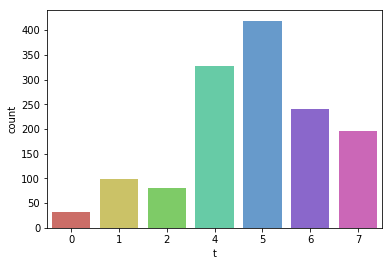

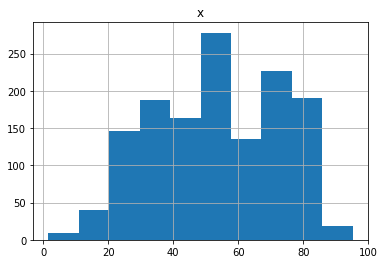

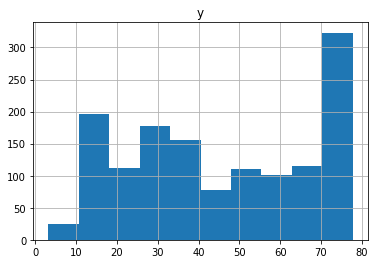

In [3]:
data = pd.read_csv("/home/ubuntu/100datasets/warm-up/classifiers/smiley.csv")
data.head()
data['t'].unique()
data.isnull().sum()
sns.countplot(x='t',data=data, palette='hls')
plt.show()
data.hist('x')
plt.show()
data.hist('y')
plt.show()


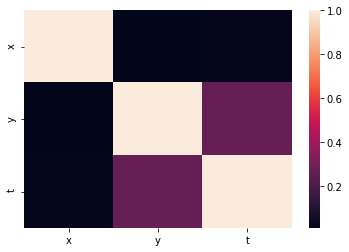

In [4]:
data.corr()
sns.heatmap(data.corr())
plt.show()

In [5]:
X, y = data[['x','y']], data['t'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0 )
X_test.describe()


,x,y
count,349.000000,349.000000
mean,52.597564,45.468195
std,19.280039,22.744085
min,2.550000,4.900000
25%,34.750000,24.800000
50%,52.050000,43.400000
75%,69.750000,70.400000
max,94.750000,77.000000


In [6]:
def plot_model(name,X,y,X_train,X_test,y_train,y_test,classifier):

   from matplotlib.colors import ListedColormap

   figure = plt.figure(figsize=(10, 5))
   h =1
   x_min, x_max = X.values[:, 0].min() - .5, X.values[:, 0].max() + .5
   y_min, y_max = X.values[:, 1].min() - .5, X.values[:, 1].max() + .5
   xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

   # just plot the dataset first
   cm = plt.cm.RdBu
   cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#FF00FF', '#00FFFF', '#000000'])
   ax = plt.subplot(1, 2, 1)
   ax.set_title("Input data")
   # Plot the training points
   ax.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, cmap=cm_bright,
              edgecolors='k')
   # Plot the testing points
   ax.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
              edgecolors='k')
   #ax.set_xlim(xx.min(), xx.max())
   #ax.set_ylim(yy.min(), yy.max())
   #ax.set_xticks(())
   #ax.set_yticks(())


   ax = plt.subplot(1, 2, 2)
      


   Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

   # Put the result into a color plot
   Z = Z.reshape(xx.shape)
   ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

   # Plot the training points
   ax.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, cmap=cm_bright,
              edgecolors='k')
   # Plot the testing points
   ax.scatter(X_test.values[:, 0], X_test.values[:, 1], c=y_test, cmap=cm_bright,
              edgecolors='k', alpha=0.6)

   ax.set_xlim(xx.min(), xx.max())
   ax.set_ylim(yy.min(), yy.max())
   ax.set_xticks(())
   ax.set_yticks(())
   ax.set_title(name)
   plt.tight_layout()
   plt.show()

In [7]:
classifier = LogisticRegression()
result = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report = classification_report (y_test, y_pred)
print (report)
accuracy_score(y_test, y_pred)

[[ 0  0  0  0  4  0  2]
 [ 0  0  0  9  0  0 22]
 [ 0  0  0  0  0 10  0]
 [ 0  0  0 51 24  0  0]
 [ 0  0  0 11 97  0  0]
 [ 0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0 55]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.00      0.00      0.00        31
          2       0.00      0.00      0.00        10
          4       0.72      0.68      0.70        75
          5       0.78      0.90      0.83       108
          6       0.86      1.00      0.93        64
          7       0.70      1.00      0.82        55

avg / total       0.66      0.77      0.71       349



/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7650429799426934

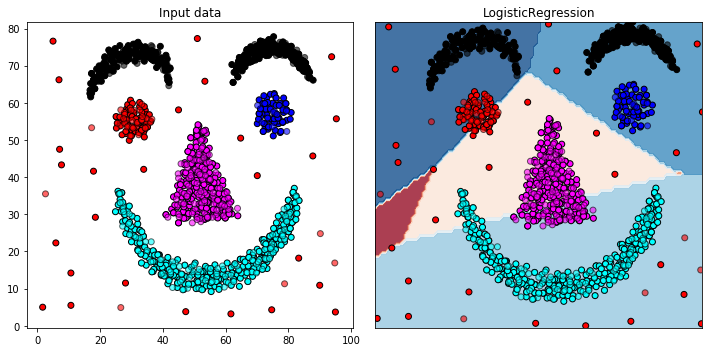

In [8]:
plot_model(names[0],X,y,X_train,X_test,y_train,y_test,classifier)

In [9]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report = classification_report (y_test, y_pred)
print (report)
accuracy_score(y_test, y_pred)

[[  2   1   0   0   3   0   0]
 [  0  31   0   0   0   0   0]
 [  0   0  10   0   0   0   0]
 [  0   0   0  75   0   0   0]
 [  0   0   0   0 108   0   0]
 [  0   0   0   0   0  64   0]
 [  0   0   0   0   0   0  55]]
             precision    recall  f1-score   support

          0       1.00      0.33      0.50         6
          1       0.97      1.00      0.98        31
          2       1.00      1.00      1.00        10
          4       1.00      1.00      1.00        75
          5       0.97      1.00      0.99       108
          6       1.00      1.00      1.00        64
          7       1.00      1.00      1.00        55

avg / total       0.99      0.99      0.99       349



0.9885386819484241

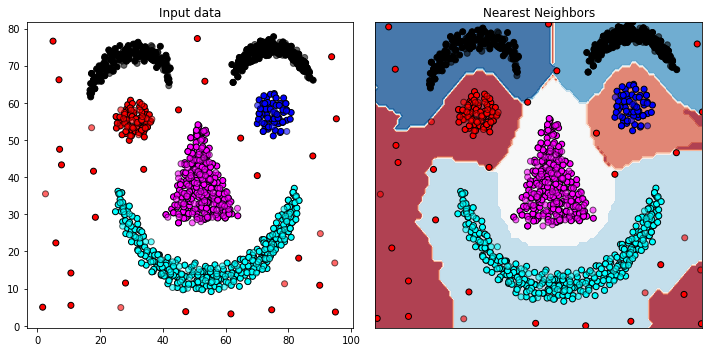

In [10]:
plot_model(names[1],X,y,X_train,X_test,y_train,y_test,classifier)

In [11]:
from sklearn import svm
classifier = svm.SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix (y_test, y_pred)
report = classification_report (y_test, y_pred)
print (confusion_matrix)
print (report)
accuracy_score(y_test, y_pred)

[[ 0  2  0  0  4  0  0]
 [ 0 31  0  0  0  0  0]
 [ 0  0 10  0  0  0  0]
 [ 0  0  0 67  8  0  0]
 [ 0  0  2 13 93  0  0]
 [ 0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0 55]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.94      1.00      0.97        31
          2       0.83      1.00      0.91        10
          4       0.84      0.89      0.86        75
          5       0.89      0.86      0.87       108
          6       1.00      1.00      1.00        64
          7       1.00      1.00      1.00        55

avg / total       0.90      0.92      0.91       349



/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9169054441260746

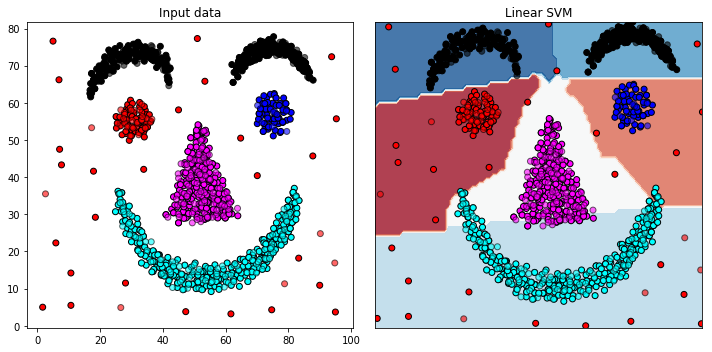

In [12]:
plot_model(names[2],X,y,X_train,X_test,y_train,y_test,classifier)

In [15]:
from sklearn.svm import SVC
classifier = SVC(gamma=2, C=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix (y_test, y_pred)
report = classification_report (y_test, y_pred)
print (confusion_matrix)
print (report)
accuracy_score(y_test, y_pred) 

[[  0   0   0   0   6   0   0]
 [  0  19   0   0  12   0   0]
 [  0   0   4   0   6   0   0]
 [  0   0   0  67   8   0   0]
 [  0   0   0   0 108   0   0]
 [  0   0   0   0   9  55   0]
 [  0   0   0   0  10   0  45]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       1.00      0.61      0.76        31
          2       1.00      0.40      0.57        10
          4       1.00      0.89      0.94        75
          5       0.68      1.00      0.81       108
          6       1.00      0.86      0.92        64
          7       1.00      0.82      0.90        55

avg / total       0.88      0.85      0.85       349



/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8538681948424068

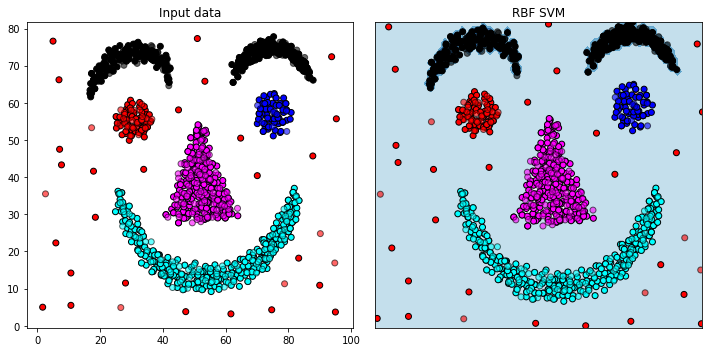

In [16]:
plot_model(names[3],X,y,X_train,X_test,y_train,y_test,classifier)

In [17]:
classifier =  DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report = classification_report (y_test, y_pred)
print (report)
accuracy_score(y_test, y_pred)

[[  3   1   0   0   2   0   0]
 [  0  31   0   0   0   0   0]
 [  0   0  10   0   0   0   0]
 [  0   0   0  72   3   0   0]
 [  0   0   0   0 108   0   0]
 [  0   0   0   0   0  64   0]
 [  0   0   0   0   0   0  55]]
             precision    recall  f1-score   support

          0       1.00      0.50      0.67         6
          1       0.97      1.00      0.98        31
          2       1.00      1.00      1.00        10
          4       1.00      0.96      0.98        75
          5       0.96      1.00      0.98       108
          6       1.00      1.00      1.00        64
          7       1.00      1.00      1.00        55

avg / total       0.98      0.98      0.98       349



0.9828080229226361

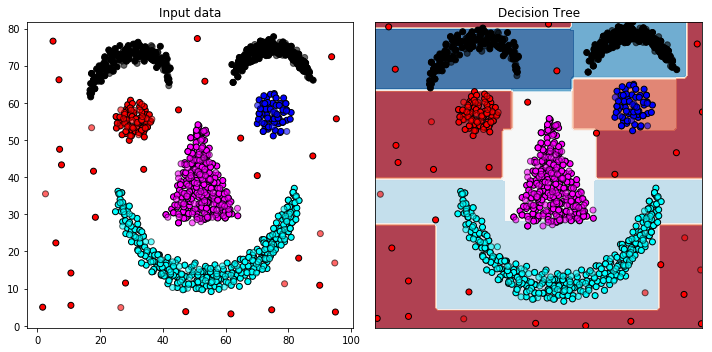

In [18]:
plot_model(names[4],X,y,X_train,X_test,y_train,y_test,classifier)

In [19]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
classifier =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
MLP_confusion_matrix = confusion_matrix(y_test, y_pred)
print(MLP_confusion_matrix)
report = classification_report (y_test, y_pred)
print (report)
accuracy_score(y_test, y_pred)

[[  3   1   0   0   2   0   0]
 [  0  31   0   0   0   0   0]
 [  0   0  10   0   0   0   0]
 [  0   0   0  74   1   0   0]
 [  0   0   0   0 108   0   0]
 [  0   0   0   0   0  64   0]
 [  0   0   0   0   0   0  55]]
             precision    recall  f1-score   support

          0       1.00      0.50      0.67         6
          1       0.97      1.00      0.98        31
          2       1.00      1.00      1.00        10
          4       1.00      0.99      0.99        75
          5       0.97      1.00      0.99       108
          6       1.00      1.00      1.00        64
          7       1.00      1.00      1.00        55

avg / total       0.99      0.99      0.99       349



0.9885386819484241

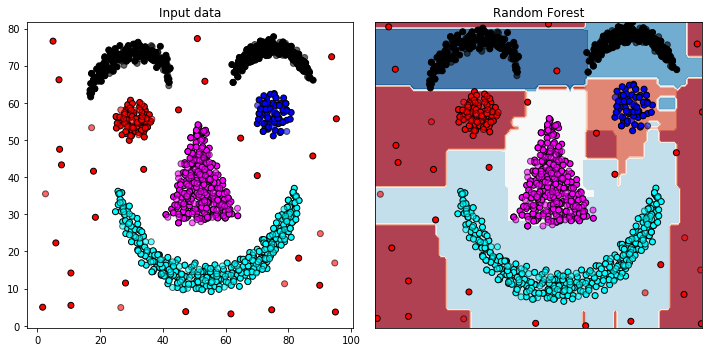

In [20]:
plot_model(names[5],X,y,X_train,X_test,y_train,y_test,classifier)

In [21]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(alpha=1, max_iter=1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report = classification_report (y_test, y_pred)
print (report)
accuracy_score(y_test, y_pred)

[[ 1  0  0  0  4  0  1]
 [ 0 21  0  0  0  0 10]
 [ 0  0  8  1  0  1  0]
 [ 0  0  0 61  0 14  0]
 [ 0  1  0 10 97  0  0]
 [ 0  0  3  0  0 61  0]
 [ 0 12  0  0  0  0 43]]
             precision    recall  f1-score   support

          0       1.00      0.17      0.29         6
          1       0.62      0.68      0.65        31
          2       0.73      0.80      0.76        10
          4       0.85      0.81      0.83        75
          5       0.96      0.90      0.93       108
          6       0.80      0.95      0.87        64
          7       0.80      0.78      0.79        55

avg / total       0.84      0.84      0.83       349



0.836676217765043

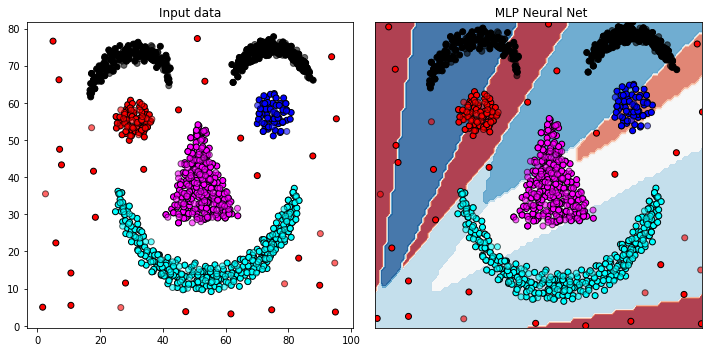

In [22]:
plot_model(names[6],X,y,X_train,X_test,y_train,y_test,classifier)

In [ ]:
classifier =   AdaBoostClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report = classification_report (y_test, y_pred)
print (report)
accuracy_score(y_test, y_pred)

In [ ]:
plot_model(names[7],X,y,X_train,X_test,y_train,y_test,classifier)

In [ ]:
classifier =   QuadraticDiscriminantAnalysis()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report = classification_report (y_test, y_pred)
print (report)
accuracy_score(y_test, y_pred)

In [ ]:
plot_model(names[8],X,y,X_train,X_test,y_train,y_test,classifier)

In [23]:
classifier =   GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report = classification_report (y_test, y_pred)
print (report)
accuracy_score(y_test, y_pred)

[[  2   0   0   0   4   0   0]
 [  0  31   0   0   0   0   0]
 [  0   0  10   0   0   0   0]
 [  0   0   0  73   2   0   0]
 [  0   0   0   0 108   0   0]
 [  0   0   0   0   0  64   0]
 [  0   0   0   0   0   0  55]]
             precision    recall  f1-score   support

          0       1.00      0.33      0.50         6
          1       1.00      1.00      1.00        31
          2       1.00      1.00      1.00        10
          4       1.00      0.97      0.99        75
          5       0.95      1.00      0.97       108
          6       1.00      1.00      1.00        64
          7       1.00      1.00      1.00        55

avg / total       0.98      0.98      0.98       349



0.9828080229226361

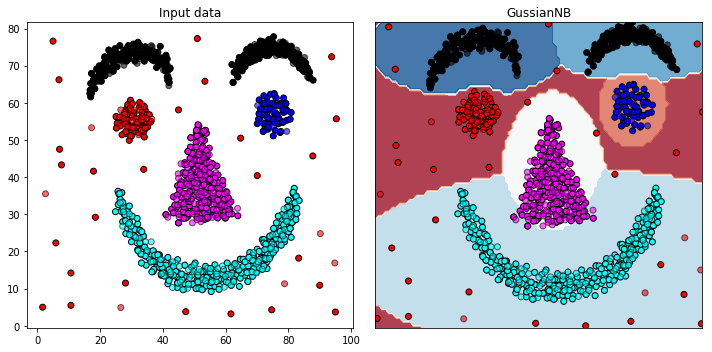

In [26]:
plot_model(names[9],X,y,X_train,X_test,y_train,y_test,classifier)